***
*Project:* Helmholtz Machine on Niche Construction

*Author:* Jingwei Liu, Computer Music Ph.D., UC San Diego

*Supervisor:* Shlomo Dubnov, Professor in Music and CSE department, UC San Diego
***

# <span style="background-color:darkorange; color:white; padding:2px 6px">Document 1</span> 

# Ground Truth Generation by Well-formedness and Preference Rules

*Updated:* March 27, 2023


In [1]:
import numpy as np
from music21 import *

The idea of rule-based music generation can be traced back to [counterpoint](https://en.wikipedia.org/wiki/Counterpoint). The construction of two sets of rules, well-formedness rules and preference rules, lies in the core of composing species counterpoint, which lays the foundation for the western music composition.

The well-formedness and preference rules also function in the musical gestalt, the perceptual grouping structure as illustrated in [A Generative Theory of Tonal Music](https://direct.mit.edu/books/book/4673/A-Generative-Theory-of-Tonal-Music), Chapter 3. The merit of having two sets of rules is that, the well-formedness rules establish the formal structure of grouping patterns and the preference rules give a refinement over it that fits the listener's actual intuitions better. The well-formedness rules work as a sturdy boundary that defines what is legal and what's not. In analogy to the premise of Free Energy Principle (FEP), adaptive agents or phenotypes must occupy a limited repertoire of states ([Reinforcement Learning or Active Inference? (Friston 2009)](https://www.fil.ion.ucl.ac.uk/spm/doc/papers/Reinforcement_Learning_or_Active_Inference.pdf)). Friston argued that, for a phenotype to exist it must possess defining characteristics or traits. These traits essentially limit the agent to a bounded region in the space of all states it could be in. Once outside these bounds, it ceases to possess that trait (cf, a fish out of water). This bounded region corresponds to the well-formed region in Figure 1 which is constrained by the well-formedness rules. In biological sense, once this bound is transgressed, the phenotype's survival status is challenged, like extreme climates, low oxygen proportions, shortage of water, etc. In musical analogy, this bound defines what is considered as music. This definition is generally open-ended but in our imagination, there should be some defining traits that distinguish music from other acoustic events such as oral languages or pure noise.

The preferred region occupies a subspace inside the well-formed region. Within all the states the phenotype could possible be in (could survive), the adaptive agents are inclined to form niches to ensure its survival status based on a better information exchange with its environment (equilibrium state). The preferred region of a phenotype denotes the ecological/cultural niche that it's immersed within. We all were born in a local world and communities that are formed by relevant social cultural groups. It's widely acknowledged that there is a thing as *culture* because there are culture differences. One thing to note is that, although we were born in our own cultural niche which may be isolated from some other culture in this world, moving from one niche to another normally won't jeopardize the phenotype's life. It could take certain amount of time for the phenotype to adapt to the new environment but in general, this migration won't give rise to any direct cause that endangers the phenotype's survival status.

The preferred region, or the niche, is not static. It's under active construction and evolution all the time. According to the Niche Construction Theory (NCT), Reciprocal causal dynamics that pertain to niche construction are expressed at two temporal scales: the timescale of ontogeny and the timescale of phylogeny. Developmental niche construction (DNC) allows for the optimization of phenotypes over ontogenetic timescales, via feedback interactions between organisms and resources of the niche. Selective niche construction (SNC) acts in tandem with natural selection to optimize phenotypes over intergenerational timescales by modifying selection pressures ([A variational approach to niche construction](https://royalsocietypublishing.org/doi/epdf/10.1098/rsif.2017.0685)). In our study, we foucs on the ontogenetic level of developmental niche construction. To show that the niche is dynamic thus the preferred region is malleable by the agent, we give a classical example of DNC called *desire path*: rushing on their way to work, people might cut the corner of the path through the park. While initially this might almost leave no trace, over time a path emerges, in turn attracting more agents to take the shortcut and underwrite the path's existence. This new path is added on to the preferred region thus updated the preferred rules of set.

One musical example for this cultural evolution and developmental niche construction is called *troping*: In Gregorian chant and early polyphony, troping means the interpolation of new notes within an existing melody. Over several years or decades, the decorative notes get longer and more established and spawn a new chant; the older notes drop out, and the process starts all over again based on the new chant. New chants give birth to baby chants in an endless cycle. Troping is not confined to the West; similar techniques are found in India and China, owing to parallel invention rather than cultural diffusion. Even the whales use troping in their musical theme transitions, as stated in [The Musical Human (Spitzer 2021, pp.302)](https://www.google.com/books/edition/The_Musical_Human/WCkfEAAAQBAJ?hl=en&gbpv=0).

<img src="Venn.jpg" style="width:550px;height:500px;">
<caption><center> **Figure 1**: Venn Diagram for Rule Sets  </center></caption>

A better formulation of the abstraction in Figure 1 under musical context is as follows. We say that, **music is a social and cultural construct that strongly reflects the historical context in which it is created**, thus the formation of music style is niche-based. The acoustic event that is recognized as music is also not universal. People from different cultural backgrounds may have distinct taste and judgement on what can be categorized as music. Therefore, a music style is constrained in our preferred region. 

**Musicking is the set of observed cultural behaviors that surround and encompass music making.** This corresponds to the active participation in cultural practices and niche construction by agents immersed in this culture. From the niche construction theory we know that its process is dynamic and evolutionary. Therefore, the preferred region is malleable and subject to change. A natural historical line of black music from Jazz to Hip-Hop denotes this shift of preferrence in different eras. 

But what defines our well-formed region? Is there a boundary that we cannot transgress in music making? It seems difficult to delineate such a boundary especially after the emergence of avant-garde, free jazz and noise music, the well-formed boundary keeps being pushed back and becomes more and more obscure. However, we still believe there is some form, or first principle that contends what is music, and we know that in this broad acoustic space, "musical events" only occupies a compact subspace. 

Although its boundary is difficult to define, one potential criteria comes from the following description of musicality: **musicality is the set of mental processes that underlie musical behavior and perception; these are much more stable across place and time.** The universal gestalt of cognition and perception may serve as a basis for what is considered music in general for human beings but such a theory is not validated yet (due to the author's limited knowledge).

One thing to note is that, we use the majority's aesthetic in a cutural niche as baseline. It means that any acoustic events outside of the preferred region would be considered non-musical. This account has a solid foundation from reality. Virtually every new music style was dismissed as noise by the mainstream, and we also tend to describe the sounds of other people - especially those less like us - as noisy ([Black Noise, Rose 1994](https://www.cambridge.org/core/journals/popular-music/article/black-noise-rap-music-and-black-culture-in-contemporary-america-by-tricia-rose-hanover-london-wesleyan-university-press-1994-xvi-241-pp/6B0C15EF1914AC34C7ABDED2F53D3A10)).

### Ground Truth Generation

In the following I will illustrate the design of our simulated ground truth data. By solving a toy problem with binary inputs, we explore our prototype's potential both experimentally and theoretically.

Each input is designed as a sequence of length 10. The classic Helmholtz machine can only take patterns with fixed length. Before generalizing it to include the temporal feature, we will stick to this convention and provide data patterns with equal length. The input for each neuron is a binary value, $0$ or $1$, thus the total possiilities for input data is $2^{10} = 1024$. The cadinality for our entire space set is $1024$.

Now let's introduce the well-formedness rules and preference rules. First, we want to design this experiment with musical essence so we need to find some analogy between the binary numbers and music. Here we define a natural mapping which maps $0$ to rest and $1$ to attack. Therefore, this ten-note sequence corresponds to a rhythmic pattern that can be played with pitched or unpitched instruments.

If we have a rhythmic pattern purely denoted by $0$ and $1$, it's natural to think about grouping conceptually and perceptually. Such as $1100111001$, by the law of proximity ([Gestalt psychology](https://en.wikipedia.org/wiki/Gestalt_psychology)), we would naturally group the $1$'s into three subgroups delineated by $0$'s. The reason why we focus on $1$ instead of $0$ comes from the reification of the sequence perceptually, where $1$ is when the sound event happens that grabs our attention and $0$ is the silence or rest that serves for the structure of such a pattern. Based on the musical gestalt, we give following sets of rules.

#### Rule 1: Boundary Conditions

As a musical pattern that is assumed to be extracted from some existing corpus, we impose some boundary conditions on these short sequences. We always assume that the sequence is chopped off tightly, starting from where the sound kicks in, ideally (but not necessarily) ends when the sound is turned off. It means there could be some room where the sequence ends with rests, instead of being chopped off immediately.

This principle could be formulated as the well-formedness rule (WFR) and preference rule (PR) as follows:

**WFR 1**.  The sequence always starts with 1.

**PR 1**.  The sequence starts with 1, and ends with 1.

#### Rule 2: Pattern Formations

Here we borrow the first local detail rule in [A Generative Theory of Tonal Music](https://direct.mit.edu/books/book/4673/A-Generative-Theory-of-Tonal-Music), Section 3.3. The statement is: **strongly avoid groups containing a single event.** The context is different but we intend to have some "pattened structures" within the sequence, and a single-pitch event (or a single attack) isolated from other sound events fails to function as an interesting constituent of a larger rhythmic pattern. This statement is not validated and may incur objections. We suggest the reader just take it as an imposed constraint over the data that helps establishing a compact subspace of the entire space, instead of treating it as serious as a theoretical contention.

This principle could be formulated into WFR and PR based on the degree of isolation of the single sound event:

**WFR 2**. Forbid single event that's strongly isolated from other groups (00100), and also avoid isolated event at the beginning (100) and the end (001) of the sequence.

**PR 2**.  Forbid single event that's isolated from other groups (010), and also avoid isolated event at the beginning (10) and the end (01) of the sequence.

#### Rule 3: Stopping Criteria

To extract a pattern from existing corpus, we need to know where to cut the sequence into shorter frames that fit our input restrictions. Intuitively we would take an extended silence as a break point, which indicates the separation of two sounding parts. Therefore, in our short sequence, we will forbid the extended silence pattern since if such a pattern occurs, the two sound events before and after it are supposed to be separated into two short sequneces as the ground truth inputs.

**WFR 3**. Forbid the extended break (0000).

**PR 3**.  Forbid the long silence (000).

*Remark*: Although the datasets are generated by the well-formedness rules and preference rules, all these rules are implicit for the agents. In other words, the interactive agents only have access to the ground truth data without the knowlegde of the rules governing them. This corresponds to the *implicit cultural learning* where the rules and facts about the world are not explicitly taught, but the agent learns the patterned cultural practices through immersive participation and is able to form "a large and stable set of implicit beliefs that govern action without needing to be stated explicitly, described, or explained" ([Thinking through other minds (Veissière 2019)](https://www.cambridge.org/core/journals/behavioral-and-brain-sciences/article/thinking-through-other-minds-a-variational-approach-to-cognition-and-culture/9A10399BA85F428D5943DD847092C14A)). 

### Preferred sequence generation

1. Start with 1, end with 1
2. Forbid 010 (no 10, 01 on the boundary)
3. Forbid 000

In [3]:
n = 10
preferred_set = np.zeros([1,10])
preferred_set[0,:2] = 1
preferred_set[0,-2:] = 1
preferred_set

array([[1., 1., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [4]:
for i in range(2, n-2):
    for j in range(np.shape(preferred_set)[0]):
        
        prefix = preferred_set[j,i-2:i]
        if np.array_equal(prefix, [0,0]) or np.array_equal(prefix, [0,1]):
            preferred_set[j,i] = 1
        else:
            preferred_set = np.append(preferred_set, preferred_set[j:j+1,:], axis=0)
            preferred_set[j,i] = 1
preferred_set   

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 0., 1., 1.],
       [1., 1., 1., 

In [5]:
np.shape(preferred_set)

(25, 10)

In [6]:
play = preferred_set[-1,:]
play

array([1., 1., 0., 0., 1., 1., 0., 0., 1., 1.])

In [8]:
# false example
play = np.array([1., 1., 0., 0., 1., 0, 1, 0., 1., 1.])

In [9]:
play = np.array([1., 1., 0., 0., 0, 1., 0., 1, 1., 1.])

In [7]:
llist = stream.Stream()
for i in range(n-1):
    if play[i] == 0:
        nt = note.Rest()
        llist.append(nt)
    else:
        nt = note.Note()
        nt.pitch.midi = 60
        nt.duration.quarterLength = 1/8
        llist.append(nt)
        rest = note.Rest()
        rest.duration.quarterLength = 3/8
        llist.append(rest)

if play[-1] == 0:
    nt = note.Rest()
    llist.append(nt)
else:
    nt = note.Note()
    nt.pitch.midi = 60
    nt.duration.quarterLength = 1
    llist.append(nt)

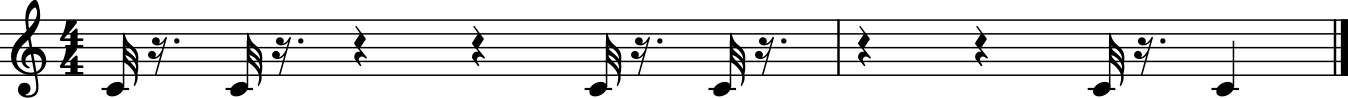

In [8]:
llist.show()

In [9]:
llist.show('midi')

### Well-formed sequence generation

1. Start with 1
2. Forbid 00100 (no 100, 001 on the boundary)
3. Forbid 0000

In [4]:
n = 10
well_formed_set = np.zeros([1,10])
well_formed_set[0,0] = 1
well_formed_set

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
for i in range(1,n):
    for j in range(np.shape(well_formed_set)[0]):
        if i == 2 and np.array_equal(well_formed_set[j,i-2:i], [1,0]):
            well_formed_set[j,i] = 1
        elif i > 3 and np.array_equal(well_formed_set[j,i-3:i], [0,0,0]):
            well_formed_set[j,i] = 1
        elif i > 3 and np.array_equal(well_formed_set[j,i-4:i], [0,0,1,0]):
            well_formed_set[j,i] = 1
        else:
            well_formed_set = np.append(well_formed_set, well_formed_set[j:j+1,:], axis=0)
            well_formed_set[j,i] = 1
            
well_formed_set

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [12]:
ind = np.array([], dtype=np.int8)
for i in range(well_formed_set.shape[0]):
    if np.array_equal(well_formed_set[i,-3:], [0,0,1]):
        ind = np.append(ind,i)

well_formed_set = np.delete(well_formed_set,ind,0)
well_formed_set.shape

(256, 10)

In [13]:
num = 52
play = well_formed_set[num,:]
play

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1.])

In [22]:
# false example
play = np.array([1., 1., 0., 0., 0, 0, 1, 0., 1., 1.])

In [23]:
play = np.array([1., 1.,1, 0., 0, 1., 0., 0., 1., 1.])

In [2]:
play = np.array([0, 1., 0., 0., 0, 1., 1, 0., 0,1])

In [5]:
llist = stream.Stream()
for i in range(n-1):
    if play[i] == 0:
        nt = note.Rest()
        llist.append(nt)
    else:
        nt = note.Note()
        nt.pitch.midi = 60
        nt.duration.quarterLength = 1/8
        llist.append(nt)
        rest = note.Rest()
        rest.duration.quarterLength = 3/8
        llist.append(rest)

if play[-1] == 0:
    nt = note.Rest()
    llist.append(nt)
else:
    nt = note.Note()
    nt.pitch.midi = 60
    nt.duration.quarterLength = 1
    llist.append(nt)

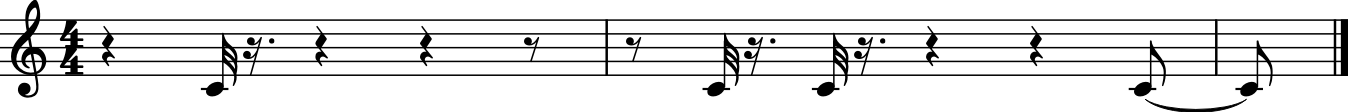

In [6]:
llist.show()

In [9]:
llist.show('midi')

In [12]:
llist.write('midi','D:/deep music/data/temp.mid')

'D:/deep music/data/temp.mid'

The cadinality of these sets based on our data simulation is summarized below:

<img src="Venn_1.jpg" style="width:550px;height:500px;">
<caption><center> **Figure 2**: Venn Diagram for Ground Truth Data  </center></caption>